In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
plt.rcParams['axes.facecolor'] = 'black'

In [79]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


## About this dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

[source](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

## Explore the dataset

In [180]:
## check if there is missing data
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [25]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


The first five rows from the dataset. This will give us an overview of what type of values in each column and what number might be assosicated with them and range. 

In [26]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There is 299 recorded patient in the dataset

In [107]:
fig_age = go.Figure()

fig_age.add_trace(go.Histogram(x=df['age'],
                               marker_color='#d6839d'))

fig_age.update_layout(
    title_text='Age Distribution',
    xaxis_title_text='Age',
    yaxis_title_text='Number of patients', 
    bargap=0.01, 
    template = 'plotly_dark',
    width=600, 
    height=450
)

fig_age.show()

The graph above seems to be distributed normally. With the peaks and mean and median tend to center in the middle
. According the the graph, old people tend to have a higher chance of getting heart failure, **mostly** a **60** with the **minimum** age of occurence at **40** and **highest** age at **90**

In [172]:
df[(df.sex == 1)].describe()
male_data = df[(df.sex == 1)]
female_data = df[(df.sex == 0)]

In [174]:
male_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.0,194.000000,194.000000,194.000000
mean,61.405500,0.396907,638.701031,0.360825,36.793814,0.314433,254370.249897,1.399175,136.536082,1.0,0.474227,129.371134,0.319588
std,12.224415,0.490522,1114.894007,0.481482,11.144308,0.465491,94447.363939,0.988976,4.132675,0.0,0.500627,77.794178,0.467523
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.600000,113.000000,1.0,0.000000,4.000000,0.000000
25%,52.000000,0.000000,115.750000,0.000000,30.000000,0.000000,203000.000000,1.000000,134.000000,1.0,0.000000,72.000000,0.000000
50%,60.000000,0.000000,249.000000,0.000000,35.000000,0.000000,253000.000000,1.100000,137.000000,1.0,0.000000,117.500000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,40.000000,1.000000,293750.000000,1.400000,139.000000,1.0,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,62.000000,1.000000,850000.000000,9.400000,148.000000,1.0,1.000000,285.000000,1.000000


In [175]:
female_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000
mean,59.777781,0.495238,476.780952,0.523810,40.466667,0.419048,279964.021619,1.384095,136.790476,0.0,0.038095,131.904762,0.323810
std,11.240919,0.502375,611.364190,0.501828,12.728728,0.495770,102108.749558,1.118633,4.904267,0.0,0.192344,77.625893,0.470173
min,40.000000,0.000000,52.000000,0.000000,15.000000,0.000000,62000.000000,0.500000,116.000000,0.0,0.000000,8.000000,0.000000
25%,50.000000,0.000000,124.000000,0.000000,30.000000,0.000000,223000.000000,0.900000,135.000000,0.0,0.000000,75.000000,0.000000
50%,60.000000,0.000000,250.000000,1.000000,38.000000,0.000000,263358.030000,1.000000,137.000000,0.0,0.000000,109.000000,0.000000
75%,66.000000,1.000000,582.000000,1.000000,50.000000,1.000000,319000.000000,1.400000,140.000000,0.0,0.000000,205.000000,1.000000
max,95.000000,1.000000,3964.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,0.0,1.000000,278.000000,1.000000


There are 194 records out of 299 showing heart failure in men. With the mean age of being **61** with standard deviation of **12.22**. **75%** of all heart failure cases occur at age of **70** or older while only **25%** of the patients suffered heart failure at the age under **52**. 


In [192]:
fig_age = go.Figure()

fig_age.add_trace(go.Histogram(x=male_data['age'],
                               marker_color='#d6839d'))

fig_age.update_layout(
    title_text='Age Distribution of male',
    xaxis_title_text='Age',
    yaxis_title_text='Number of patients', 
    bargap=0.01, 
    template = 'plotly_dark',
    width=600, 
    height=450
)

fig_age.show()

In [193]:
fig_age = go.Figure()

fig_age.add_trace(go.Histogram(x=female_data['age'],
                               marker_color='#d6839d'))

fig_age.update_layout(
    title_text='Age Distribution of female',
    xaxis_title_text='Age',
    yaxis_title_text='Number of patients', 
    bargap=0.01, 
    template = 'plotly_dark',
    width=600, 
    height=450
)

fig_age.show()

## Overview


1. Age - Age of patient
2. Anaemia - decrease in red blood cell, Yes = 1, No = 0
3. CPK level - measure in mcg/L
4. Diabetes - 0 = No, 1 = Yes
5. Ejection Fraction - measure in %
6. High_blood_pressure - 0 = No, 1 = Yes
7. Platelets - Number of platelets (integer)
8. Serum creatinine - Level of serum creatinine in the blood (mg/dL)
9. Serum Sodium - Level of serum sodium in the blood (mEq/L)
10. Sex - Gender of patient Male = 1, Female = 0
11. Smoking - 0 = No, 1 = Yes
12. Time - Follow-up period (days)
13. DEATH_EVENT - Indicate death 0 = No, 1 = Yes

These are the factors that might contribute to the reasons leading to heart failure. They might also can be use to indicate death events. There are many other factors in real life that affect the prediction and result because there are more factors and reasons behind heart failure rather than just 13 factors listed above. 

In [179]:

male_survi = male_data[male_data["DEATH_EVENT"]==0]
male_not = male_data[male_data["DEATH_EVENT"]==1]
female_survi = female_data[female_data["DEATH_EVENT"]==0]
female_not = female_data[female_data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survi),len(male_not),
         len(female_survi),len(female_not)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender",
    width=600, 
    height=450
)
fig.show()

In [191]:
surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
colors = ["#7b4397", "#dc2430"]
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5, colors=colors)
fig.update_layout(
    title_text="Age of survival",
    width=700, 
    height=500
)
fig.show()

## Creatinine Phosphokinase

Creatinine Phosphokinase also known as CPK is the enzyme level within the bloodstreams that leaks when the muscle tissues are damaged, and could happen in the heart or brain. The normal measured CPK  level range varies between female and male. Normal range of total CPK level is ranging from  10 - 120 mcg/L. In  particular, the normal range of serum CK in males is 39–308 IU/L and in females is 26–292 IU/L. Abnormal level of CPK indicate that somewhere in our body, the muscle tissues are damagaed and requires further diagnostic so we will know which part of our body is being damage. Some common tissue damage can be located in brain, heart. 

We will start by looking at the CPK distribution in male and female, this will tell us out of total number of patient, there is a certain probability of patient that either have normal CPK level or abnormal CPK level. 

In [95]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[(df.sex == 1)]['creatinine_phosphokinase'],
                               marker_color='#d6839d'))

fig.update_layout(
    title_text='Creatinine Phosphokinase distribution in Male',
    xaxis_title_text='CPK in mcg/L',
    yaxis_title_text='Number of patients', 
    bargap=0.01, 
    template = 'plotly_dark',
    width=600, 
    height=450
)
fig.show()

The graph was showing the CPK level distribution within 194 males. As the CPK level was getting higher, the number of males that got high CPK level would be decreased, means that there is lower chance of people would get heart failure if they have higher level of CPK. 

In [153]:
normal_cpk_level_male = df[(df['creatinine_phosphokinase'] >= 10) & 
                        (df['creatinine_phosphokinase'] <= 120) & (df.sex == 1)]

abnormal_cpk_level_male = df[(df['creatinine_phosphokinase'] < 10) | 
                          (df['creatinine_phosphokinase'] > 120) & (df.sex == 1)]
labels = ['CPK Normal Level', 'CPK Abnormal Level']
values = [len(normal_cpk_level_male), len(abnormal_cpk_level_male)]
colors = ["#08fcd4", "#a207f5"]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number CPK level in male - CPK',
    template = 'plotly_dark',
    width=600, 
    height=450
)

In [138]:
normal_cpk_level_male = df[(df['creatinine_phosphokinase'] >= 10) & 
                        (df['creatinine_phosphokinase'] <= 120) & (df.sex == 1)]

abnormal_cpk_level_male = df[(df['creatinine_phosphokinase'] < 10) | 
                          (df['creatinine_phosphokinase'] > 120) & (df.sex == 1)]
labels = ['CPK Normal Level', 'CPK Abnormal Level']

values = [len(normal_cpk_level_male[normal_cpk_level_male['DEATH_EVENT'] == 1]),
          len(abnormal_cpk_level_male[abnormal_cpk_level_male['DEATH_EVENT'] == 1])]
total_deaths = len(normal_cpk_level_male[normal_cpk_level_male['DEATH_EVENT'] == 1]) + len(abnormal_cpk_level_male[abnormal_cpk_level_male['DEATH_EVENT'] == 1])
death_prob = round((total_deaths / len(df[(df.sex == 1)].index)) * 100)
colors = ["#08fcd4", "#a207f5"]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of deaths in male - CPK, prob: {death_prob}% ',
    template = 'plotly_dark',
    width=600, 
    height=450
)

Of all heart failure cases in Male, there are only **32%** of the patients die. The recorded level of CPK reveals that **75.8%** of all deaths have an abnormal CPK level which is above **120** mcg/L. In other words, **75.8%** of cases have muscular tissue damage but perhaps is cardiac muscular tissue which is why it results in heart failure. Leaving us with **24.2%** of all deaths have normal CPK level.  

In [149]:
male_have_anaemia = df[(df.sex == 1) & (df.anaemia == 1)]
male_donot_have_anameia = df[(df.sex == 1) & (df.anaemia == 0)]
labels = ["Male have anaemia", "Male do not have anaemia"]
values = [len(male_have_anaemia), len(male_donot_have_anameia)]
colors = ["#08fcd4", "#a207f5"]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of decrease in red blood cell in male',
    template = 'plotly_dark',
    width=600, 
    height=450
)

This piechart is showing the number of high blood pressure in males that having the heart failure. On the graph present 100% of males, in while, there is 60.3% of males have anaemia and 39.7% of male have anaemia that also having heart failure. 

In [146]:
labels = ["Male have anaemia", "Male do not have anaemia"]
values = [len(male_have_anaemia[male_have_anaemia['DEATH_EVENT'] == 1]), 
          len(male_donot_have_anameia[male_donot_have_anameia['DEATH_EVENT'] == 1])]
colors = ["#08fcd4", "#a207f5"]
fig = go.Figure()
total_deaths = sum(values)
death_prob = round((total_deaths / len(df[(df.sex == 1)].index)) * 100)
fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of deaths in male with decrease in red blood cell, prob: {death_prob}% ',
    template = 'plotly_dark',
    width=700, 
    height=450
)

The graph showing the total deaths of males with high blood pressure that occurs in heart failure. According to the graph, there are 41.9% of deaths from heart failure that occur having the anaemia and 58.1% of deaths that do not have the anaemia that also having heart failure. The graph the mostrated that male do not have the high blood pressure can also die frm heart failure, so the high blood pressure would not be the main reason contributed in this numbers of deaths. 

In [140]:
male_have_diabetes = len(df[(df.sex == 1) & (df.diabetes == 1)])
male_donot_have_diabetes = len(df[(df.sex == 1) & (df.diabetes == 0)])
colors = ["#08fcd4", "#a207f5"]
labels = ["Male have diabetes", "Male don't have diabetes"]
values = [male_have_diabetes, male_donot_have_diabetes]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of diabetes in male',
    template = 'plotly_dark',
    width=600, 
    height=450
)

**63.9%** of male do not have diabetes while **36.1%** have diabetes. According to study have shown that people with diabetes have a higher risk of getting heart failure even if we have a normal cholestorol level. Additionally, if they also have coronary artery disease (CAD) and high blood pressure. Some types of diabetes medications such as  rosiglitazone (Avandia) might cause or even worsen heart failure. We can conclude that diabetes result in higher risk of getting heart failure. However of all patients got heart failure, diabetes might not always be the main cause. 

In [141]:
male_have_diabetes = df[(df.sex == 1) & (df.diabetes == 1)]
male_donot_have_diabetes = df[(df.sex == 1) & (df.diabetes == 0)]
colors = ["#08fcd4", "#a207f5"]
labels = ["Male have diabetes", "Male don't have diabetes"]
values = [len(male_have_diabetes[male_have_diabetes['DEATH_EVENT'] == 1]), 
          len(male_donot_have_diabetes[male_donot_have_diabetes['DEATH_EVENT'] == 1])]
fig = go.Figure()
total_deaths = len(male_have_diabetes[male_have_diabetes['DEATH_EVENT'] == 1]) + len(male_donot_have_diabetes[male_donot_have_diabetes['DEATH_EVENT'] == 1])
death_prob = round((total_deaths / len(df[(df.sex == 1)].index)) * 100)
fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of deaths in male with diabetes, prob: {death_prob}% ',
    template = 'plotly_dark',
    width=600, 
    height=450
)

The graph shows the total number of death in male that died from heart failure. There are 32.3% of male have diabetes and male that don't have diabetes, it has shown the male do not have diabetes is at 67.7%. 

In [169]:
female_have_diabetes = len(df[(df.sex == 0) & (df.diabetes == 1)])
female_donot_have_diabetes = len(df[(df.sex == 0) & (df.diabetes == 0)])
colors = ["#08fcd4", "#a207f5"]
labels = ["Female have diabetes", "Female don't have diabetes"]
values = [female_have_diabetes, female_donot_have_diabetes]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of diabetes in female',
    template = 'plotly_dark',
    width=600, 
    height=450
)

In [171]:
female_have_diabetes = df[(df.sex == 0) & (df.diabetes == 1)]
female_donot_have_diabetes = df[(df.sex == 0) & (df.diabetes == 0)]
colors = ["#08fcd4", "#a207f5"]
labels = ["Female have diabetes", "Female don't have diabetes"]
values = [len(female_have_diabetes[female_have_diabetes['DEATH_EVENT'] == 1]), 
          len(female_donot_have_diabetes[female_donot_have_diabetes['DEATH_EVENT'] == 1])]
fig = go.Figure()
total_deaths = len(female_have_diabetes[female_have_diabetes['DEATH_EVENT'] == 1]) + len(female_donot_have_diabetes[female_donot_have_diabetes['DEATH_EVENT'] == 1])
death_prob = round((total_deaths / len(df[(df.sex == 0)].index)) * 100)
fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of deaths in female with diabetes, prob: {death_prob}% ',
    template = 'plotly_dark',
    width=600, 
    height=450
)

In [118]:
normal_ejection_fract_male = df[(df['ejection_fraction'] >= 55) & (df.sex == 1)]

reduced_ejection_fract_male = df[(df['ejection_fraction'] <= 50) & (df.sex == 1)]

borderline_ejection_fract_male = df[(df['ejection_fraction'] < 55) & 
                                 (df['ejection_fraction'] > 50) & (df.sex == 1)]



fig = go.Figure()

fig.add_trace(go.Histogram(x=male_data['ejection_fraction'],
                                      marker_color='#d6839d'))

fig.update_layout(
    title_text='Ejection Fraction Distribution in male',
    xaxis_title_text='Ejection fraction (%)',
    yaxis_title_text='Number of patients', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=600, height=450
)

fig.show()

The graph is showing the amount of blood that is pump out of the left ventrivle within the cadiac system with contraction in the male people. According to the graph, all the patients having their ejection fraction lower than 50% in which their heart functioning was not well which causes in heart failure. They ranging from 10% (lowest) to 60% (highest), and it forming the normal distribution.  

In [156]:
colors = ['#7eff5e', '#ff5e79', '#fddb3a']

labels = ['Reduced Ejection Fraction', 'Normal Ejection Fraction',  
          'Borderline Ejection Fraction ']

values = [len(reduced_ejection_fract_male), 
            len(normal_ejection_fract_male),
          len(borderline_ejection_fract_male)]

fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values,
                         hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Ejection fraction level in male - Ejection Fraction, prob {death_prob}%',
    template = 'plotly_dark',
    width=600, 
    height=450
)

In [145]:
colors = ['#7eff5e', '#ff5e79', '#fddb3a']

labels = ['Reduced Ejection Fraction', 'Normal Ejection Fraction',  
          'Borderline Ejection Fraction ']

values = [len(reduced_ejection_fract_male[reduced_ejection_fract_male['DEATH_EVENT'] == 1]), 
            len(normal_ejection_fract_male[normal_ejection_fract_male['DEATH_EVENT'] == 1]),
          len(borderline_ejection_fract_male[borderline_ejection_fract_male['DEATH_EVENT'] == 1])]
total_deaths = sum(values)
death_prob = round((total_deaths / len(df[(df.sex == 1)].index)) * 100)
fig_eject_fract = go.Figure()

fig_eject_fract.add_trace(go.Pie(labels=labels, values=values,
                         hole=.4, marker_colors=colors))

fig_eject_fract.update_layout(
    title_text=f'Total number of deaths in male - Ejection Fraction, prob {death_prob}%',
    template = 'plotly_dark',
    width=600, 
    height=450
)

There is 96.8% of death in male that is reduced ejection fraction, while there is only 3.23% of normal ejection fraction and 0% for borderline ejection fraction. The graph demostrated the highest contribution in heart failure was due to the reduced level, which the left ventricle was not functioning well. This is surely the main factor that lead to death in heart failure. 

## High blood pressure in male

High blood pressure or **hypertension**. It's when your blood pressure is above the normal. Although blood pressure level changes throughout the days depend on our activities but having a consistent high level of blood pressure may result in **hypertension** or **high blood pressure**. 

It is a serious condition in which the force of the blood against the artery walls is too high.
Usually hypertension is defined as blood pressure above 140/90, and is considered severe if the pressure is above 180/120.
High blood pressure often has no symptoms. Over time, if untreated, it can cause health conditions, such as heart disease and stroke.
Eating a healthier diet with less salt, exercising regularly and taking medication can help lower blood pressure.

In [148]:
normal_blood_pressure_male = df[(df['high_blood_pressure'] == 0) & (df.sex == 1)]

high_blood_pressure_male = df[(df['high_blood_pressure'] == 1) & (df.sex == 1)]

colors = ["#08fcd4", "#a207f5"]
labels = ["Normal blood pressure", "High blood pressure"]
values = [len(normal_blood_pressure_male), len(high_blood_pressure_male)]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of high blood pressure in male',
    template = 'plotly_dark',
    width=600, 
    height=450
)

Out of 199 male patients have heart failure problems, 68.6% of them have normal blood pressure which is something quite interesting. According to study, if a patient has heart faliure, there is a high chance he/she also has high blood pressure. High blood pressure means your heart does not provide enough blood and your heart needs to work harder to pump enough blood around the body. And after a while, the heart gets fatigue and results in heart failure. 

We can conclude that people who have heart failure may not always have high blood pressure. In this case we might want to see the CPK level in male again. Over 70% of the male patients suffer from abnormal CPK level. Perhaps this might be the main reason leading to heart failure leaving the rest with a very small percentage chance of occurence.

In [150]:
labels = ['High blood pressure', 'Normal blood pressure']
values = [len(high_blood_pressure_male[high_blood_pressure_male['DEATH_EVENT'] == 1]), 
          len(normal_blood_pressure_male[normal_blood_pressure_male['DEATH_EVENT'] == 1])]
colors = ["#08fcd4", "#a207f5"]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of death high blood pressure in male',
    template = 'plotly_dark',
    width=600, 
    height=450
)

64.5% of the number people died from heart failure had normal blood pressure. There are 61 people have high blood pressure and 22 of them die and that is **36%** of people who have high blood pressure die from heart failure. Number of people death that have normal blood pressure is 40 out of 133 people have normal blood pressure results in **30%** of them die.

As statistic suggests, people who have high blood pressure while also having heart failure increase the risk of dying during the treatment process while people with normal blood pressure still have a high chance of dying from heart failure with just 6% chance less than high blood pressure. 


In [167]:
normal_blood_pressure_female = df[(df['high_blood_pressure'] == 0) & (df.sex == 0)]

high_blood_pressure_female = df[(df['high_blood_pressure'] == 1) & (df.sex == 0)]

colors = ["#08fcd4", "#a207f5"]
labels = ["Normal blood pressure", "High blood pressure"]
values = [len(normal_blood_pressure_female), len(high_blood_pressure_female)]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of high blood pressure in female',
    template = 'plotly_dark',
    width=600, 
    height=450
)

In [168]:
labels = ['High blood pressure', 'Normal blood pressure']
values = [len(high_blood_pressure_female[high_blood_pressure_female['DEATH_EVENT'] == 1]), 
          len(normal_blood_pressure_female[normal_blood_pressure_female['DEATH_EVENT'] == 1])]
colors = ["#08fcd4", "#a207f5"]
fig = go.Figure()

fig.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig.update_layout(
    title_text=f'Total number of death high blood pressure in female',
    template = 'plotly_dark',
    width=600, 
    height=450
)

## Platelets level in male

Platelets are tiny blood cell that help our body to form clots in order to stop bleeding. When we get injured, our body send the signal to platelets and tell them to fix the damage. When the number of platelets are low, they can't form plot and therefore result in severe bleeding which can cause several problems to our body while too many of those can lead to stroke, heart attack, etc. 

**Normal number of platelets**: 150.000 to 400.000

In [165]:
normal_platelets_level_male = df[(df['platelets'] >= 150000) & (df['platelets'] <= 450000) & (df.sex == 1)]

abnormal_platelets_level_male = df[(df['platelets'] < 150000) | (df['platelets'] > 450000) & (df.sex == 1)]

fig = go.Figure()

fig.add_trace(go.Histogram(x=male_data['platelets'], 
                                      marker_color='#6a6fff'))

fig.update_layout(
    title_text='Platelets Distribution in male',
    xaxis_title_text='Platelets (kiloplatelets/mL)',
    yaxis_title_text='Number of patients', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=600, height=450
)

fig.show()

In [173]:
normal_platelets_level_female = df[(df['platelets'] >= 150000) & (df['platelets'] <= 450000) & (df.sex == 0)]

abnormal_platelets_level_female = df[(df['platelets'] < 150000) | (df['platelets'] > 450000) & (df.sex == 0)]

fig = go.Figure()

fig.add_trace(go.Histogram(x=female_data['platelets'], 
                                      marker_color='#6a6fff'))

fig.update_layout(
    title_text='Platelets Distribution in female',
    xaxis_title_text='Platelets (kiloplatelets/mL)',
    yaxis_title_text='Number of patients', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=600, height=450
)

fig.show()

In [53]:
df[(df.sex == 0)].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000
mean,59.777781,0.495238,476.780952,0.523810,40.466667,0.419048,279964.021619,1.384095,136.790476,0.0,0.038095,131.904762,0.323810
std,11.240919,0.502375,611.364190,0.501828,12.728728,0.495770,102108.749558,1.118633,4.904267,0.0,0.192344,77.625893,0.470173
min,40.000000,0.000000,52.000000,0.000000,15.000000,0.000000,62000.000000,0.500000,116.000000,0.0,0.000000,8.000000,0.000000
25%,50.000000,0.000000,124.000000,0.000000,30.000000,0.000000,223000.000000,0.900000,135.000000,0.0,0.000000,75.000000,0.000000
50%,60.000000,0.000000,250.000000,1.000000,38.000000,0.000000,263358.030000,1.000000,137.000000,0.0,0.000000,109.000000,0.000000
75%,66.000000,1.000000,582.000000,1.000000,50.000000,1.000000,319000.000000,1.400000,140.000000,0.0,0.000000,205.000000,1.000000
max,95.000000,1.000000,3964.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,0.0,1.000000,278.000000,1.000000


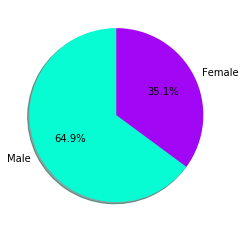

In [66]:
male_count = len(df[(df.sex == 1)].index)
female_count = len(df[(df.sex == 0)].index)
labels = ['Male', 'Female']
size = [male_count, female_count]
colors = ["#08fcd4", "#a207f5"]
plt.pie(size, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
plt.show()

Out of all the patients, there are **64.9%** of those being male. We can tell that being a **Male** increases the likelihood of getting **heart failure**. So men are being put at risk when growing older, this is probably due to many factors such as high blood pressure or Coronary artery disease (CAD) which is quite commone is men. While **Female** have less chance of getting heart failure, however, they are likely to develop diastolic heart failure (a failure of the heart muscle to relax normally).

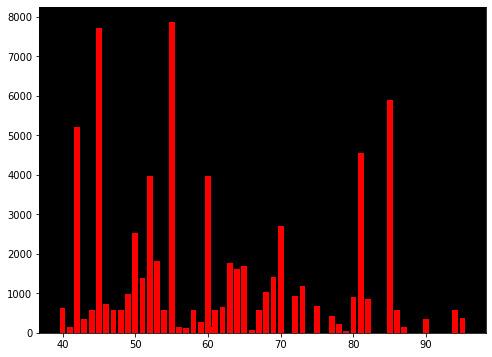

In [77]:
plt.subplots(figsize=(8,6))
plt.bar(df['age'], df['creatinine_phosphokinase'], color="red")
plt.show()




In [64]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df['creatinine_phosphokinase'],
                               marker_color='#fcba03'))

fig.update_layout(
    title_text='Creatinine Phosphokinase Distribution',
    xaxis_title_text='CPK level in mcg/L',
    yaxis_title_text='Count', 
    bargap=0.01, 
    template = 'plotly_dark',
    width=600, 
    height=450
)

fig.show()

The frequency distributio of CPK level is skewed right. We can see there is a long tail in the right side of the graph with the majority of the data distributed around 0-1000 cpk